<img src="https://www.androidhive.info/wp-content/uploads/2017/12/android-user-activity-recognition-still-walking-running-driving.jpg" width="1200">

#  1. BUSINESS PROBLEM
## 1.1 Description
<p>Human activity recognition is the problem of classifying sequences of accelerometer data recorded by specialized harnesses or smart phones into known well-defined movements.</p>
<p>
It is a challenging problem given the large number of observations produced each second, the temporal nature of the observations, and the lack of a clear way to relate accelerometer data to known movements.
</p>

<b>Implementation : </b>It can be used in Smartwatches, fitbit to record the daily activities of a person and help the person to maintain a balanced life.


## 1.2 Problem Statement
This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying by:
-  Classsical Machine Learning models using domain expert/engineered features
-  Deep Learning models using raw time series features

## 1.3 Collection of Data
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

<img src="https://www.sralab.org/sites/default/files/inline-images/mobility_fig_0.png" width="400">

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations.

1) The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).  

2) From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.  

3) The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.  
4) After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___).  

5) The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.  

6) Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.  

7) These are the signals that we got so far.  
-  tGravityAcc-XYZ
-  tBodyAccJerk-XYZ
-  tBodyGyro-XYZ
-  tBodyGyroJerk-XYZ
-  tBodyAccMag
-  tGravityAccMag
-  tBodyAccJerkMag
-  tBodyGyroMag
-  tBodyGyroJerkMag
-  fBodyAcc-XYZ
-  fBodyAccJerk-XYZ
-  fBodyGyro-XYZ
-  fBodyAccMag
-  fBodyAccJerkMag
-  fBodyGyroMag
-  fBodyGyroJerkMag  

8) We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.  
___mean()___: Mean value  
___std()___: Standard deviation  
___mad()___: Median absolute deviation  
___max()___: Largest value in array  
___min()___: Smallest value in array  
___sma()___: Signal magnitude area  
___energy()___: Energy measure. Sum of the squares divided by the number of values.  
___iqr()___: Interquartile range  
___entropy()___: Signal entropy  
___arCoeff()___: Autorregresion coefficients with Burg order equal to 4  
___correlation()___: correlation coefficient between two signals  
___maxInds()___: index of the frequency component with largest magnitude  
___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency  
___skewness()___: skewness of the frequency domain signal  
___kurtosis()___: kurtosis of the frequency domain signal  
___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.  
___angle()___: Angle between to vectors.  

9) We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable.
-  gravityMean
-  tBodyAccMean
-  tBodyAccJerkMean
-  tBodyGyroMean
-  tBodyGyroJerkMean

# 2. MACHINE LEARNING PROBLEM

## 2.1 Data
### 2.1.1 Data Overview
<b>Source :</b> https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
        
In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.
-  WALKING as 1  
-  WALKING_UPSTAIRS as 2  
-  WALKING_DOWNSTAIRS as 4  
-  SITTING as 3  
-  STANDING as 5  
-  LAYING as 6  

Train and test data were saperated
-  The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
-  All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
-  Feature names are present in 'UCI_HAR_dataset/features.txt'.  

___Train Data___
- 'UCI_HAR_dataset/train/X_train.txt'
- 'UCI_HAR_dataset/train/subject_train.txt'
- 'UCI_HAR_dataset/train/y_train.txt'

___Test Data___
- 'UCI_HAR_dataset/test/X_test.txt'
- 'UCI_HAR_dataset/test/subject_test.txt'
- 'UCI_HAR_dataset/test/y_test.txt'

## 2.2 Mapping the real world problem to an ML problem  
### 2.2.1 Type of Machine Leaning Problem
<p> It is a <b>multiclass classification</b> problem, for given features we have to predict one of the 6 human activities. </p>

### 2.2.2 Performance Metric
* multi log-loss
* Accuracy
* Precission,Recall and F1 score for each activity

# 3. EXTRACTION OF DATA AND FEATURES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from datetime import datetime

from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

## 3.1 Loading of Data

### 3.1.1 Domain expert/engineered features

In [25]:
with open("UCI_HAR_Dataset/features.txt") as f:
    features = [line.split()[1] for line in f.readlines()]
print("Number of expert domain engineered features:  ",len(features))

Number of expert domain engineered features:   561


### 3.1.2 Loading the Train Data

In [26]:
X_train = pd.read_csv("UCI_HAR_Dataset/train/X_train.txt", delim_whitespace = True, header = None, names = features)

X_train['subject'] = pd.read_csv("UCI_HAR_Dataset/train/subject_train.txt", header = None, squeeze = True)

y_train = pd.read_csv("UCI_HAR_Dataset/train/y_train.txt", names =['Activity'], squeeze = True)
y_train_labels = y_train.map({1:"WALKING",
                              2:"WALKING_UPSTAIRS",
                              3:"WALKING_DOWNSTAIRS",
                              4:"SITTING",
                              5:"STANDING",
                              6:"LAYING"})

train_data = X_train
train_data['Activity'] = y_train
train_data['ActivityName'] = y_train_labels
train_data.sample()

/opt/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2775,0.265884,-0.020794,-0.128042,-0.995699,-0.993071,-0.978309,-0.99596,-0.992703,-0.976971,-0.943479,...,0.015237,0.424723,0.331635,-0.556443,0.402106,-0.735121,0.259886,15,6,LAYING


In [27]:
print("Dimensions of Training Data: ",train_data.shape)

Dimensions of Training Data:  (7352, 564)


### 3.1.3 Loading the Test Data

In [28]:
X_test = pd.read_csv("UCI_HAR_Dataset/test/X_test.txt", delim_whitespace = True, header = None, names = features)

X_test['subject'] = pd.read_csv("UCI_HAR_Dataset/test/subject_test.txt", header = None, squeeze = True)

y_test = pd.read_csv("UCI_HAR_Dataset/test/y_test.txt", names =['Activity'], squeeze = True)
y_test_labels = y_test.map({1:"WALKING",
                              2:"WALKING_UPSTAIRS",
                              3:"WALKING_DOWNSTAIRS",
                              4:"SITTING",
                              5:"STANDING",
                              6:"LAYING"})

test_data = X_test
test_data['Activity'] = y_test
test_data['ActivityName'] = y_test_labels
test_data.sample()

/opt/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1254,0.274152,-0.000265,-0.10381,-0.966143,-0.743047,-0.876623,-0.972685,-0.722929,-0.876238,-0.864899,...,0.038231,-0.071414,0.001685,0.475214,-0.937885,0.083207,-0.026827,12,4,SITTING


In [29]:
print("Dimensions of Test Data: ",test_data.shape)

Dimensions of Test Data:  (2947, 564)


## 3.2. Check for Duplicates

In [30]:
print("Number of duplicates in Training data: ",sum(train_data.duplicated()))
print("Number of duplicates in Test data: ",sum(test_data.duplicated()))

Number of duplicates in Training data:  0
Number of duplicates in Test data:  0


## 3.3 Checking for Missing values

In [31]:
print("Number of NaN/null values in Training data: ",train_data.isnull().values.sum())
print("Number of NaN/null values in Test data: ",test_data.isnull().values.sum())

Number of NaN/null values in Training data:  0
Number of NaN/null values in Test data:  0


## 3.4 Check for data imbalance

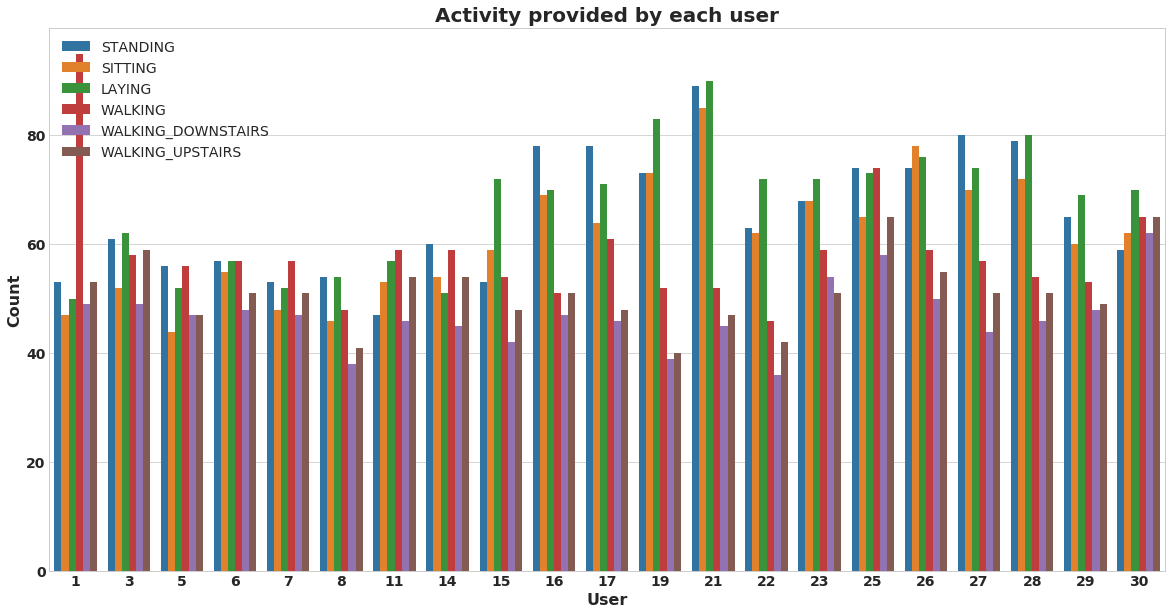

In [32]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize = (20,10))

sns.countplot(x = "subject", hue = "ActivityName", data = train_data)
plt.title('Activity provided by each user', fontsize=20, fontweight = 'bold')
plt.xlabel("User", fontsize=16, fontweight = 'bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.ylabel("Count", fontsize=16, fontweight = 'bold')
plt.yticks(fontsize=14, fontweight = 'bold')
plt.legend(fontsize=14)
plt.show()

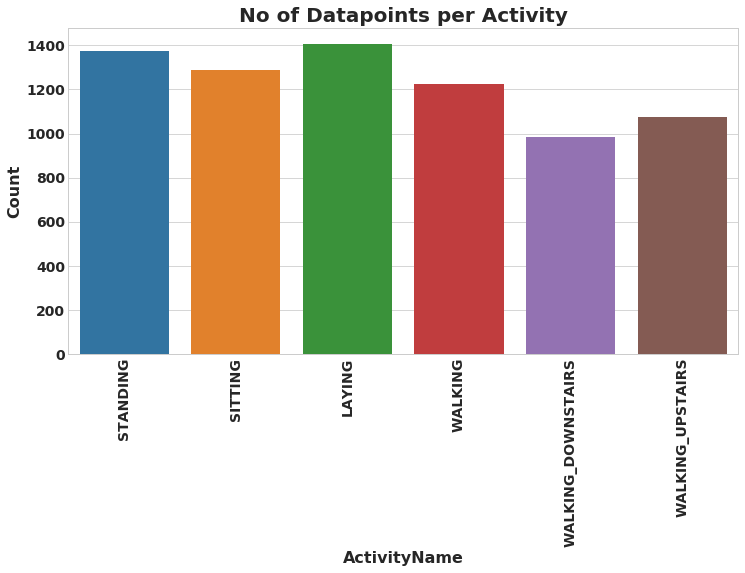

In [33]:
plt.figure(figsize = (12,6))
sns.countplot(train_data.ActivityName)
plt.title('No of Datapoints per Activity', fontsize=20, fontweight = 'bold')
plt.xlabel("ActivityName", fontsize=16, fontweight = 'bold')
plt.xticks(rotation = 90,fontsize=14, fontweight = 'bold')
plt.ylabel("Count", fontsize=16, fontweight = 'bold')
plt.yticks(fontsize=14, fontweight = 'bold')
plt.show()

<b>Obsevations:</b>
- All the activities are almost well balanced.
- Hence, no need of balancing the dataset.

## 3.5. Changing engineered feature names
-  Expert engineered feature names are preproprocesesd and cleaned to remove characters like ',','-','()' for simplicity.

In [34]:
columns = train_data.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

print(train_data.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


# 4. EXPLOARATORY DATA ANALYSIS

## 4.1 Featuring Engineering from Domain Knowledge 


<b>Static and Dynamic Activities</b>

    - In static activities (sit, stand, lie down).motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

### 4.1.1. Stationary and Motion activities are completely different

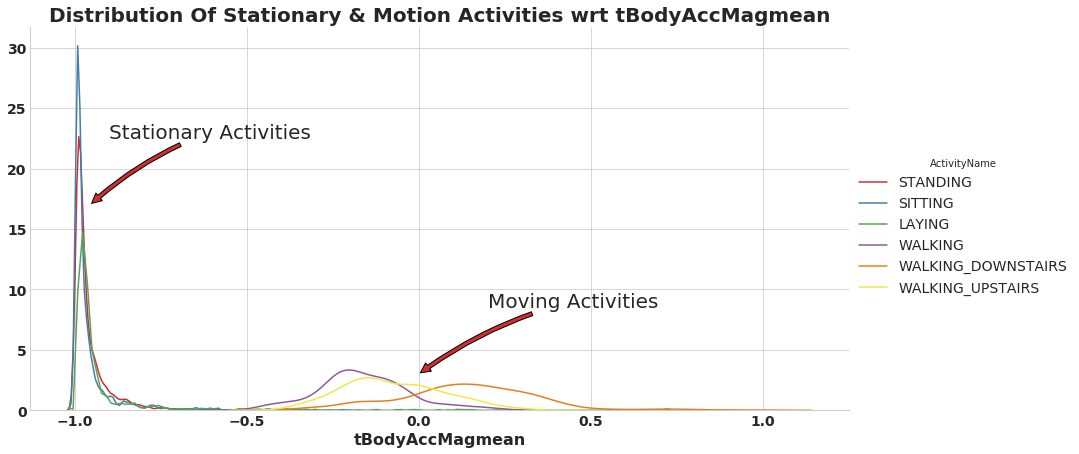

In [35]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue = 'ActivityName', size = 6, aspect = 2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist = False).add_legend(fontsize=14)
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Distribution Of Stationary & Motion Activities wrt tBodyAccMagmean', fontsize=20, fontweight = 'bold')
plt.xlabel("tBodyAccMagmean", fontsize=16, fontweight = 'bold')
plt.xticks(fontsize=14, fontweight = 'bold')
plt.yticks(fontsize=14, fontweight = 'bold')
plt.show()

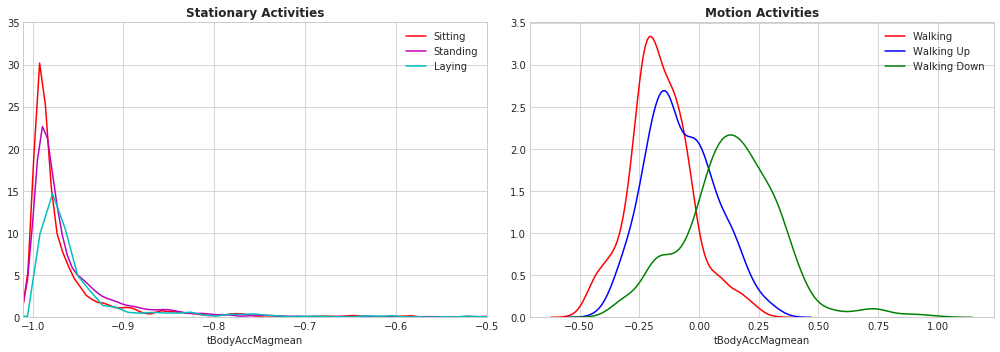

In [36]:
df1 = train_data[train_data['Activity'] == 1]
df2 = train_data[train_data['Activity'] == 2]
df3 = train_data[train_data['Activity'] == 3]
df4 = train_data[train_data['Activity'] == 4]
df5 = train_data[train_data['Activity'] == 5]
df6 = train_data[train_data['Activity'] == 6]

plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.distplot(df4['tBodyAccMagmean'], color= 'r', hist = False, label ="Sitting")
sns.distplot(df5['tBodyAccMagmean'], color= 'm', hist = False, label ="Standing")
sns.distplot(df6['tBodyAccMagmean'], color= 'c', hist = False, label ="Laying")
plt.title("Stationary Activities",fontweight = 'bold')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend()

plt.subplot(1,2,2)
sns.distplot(df1['tBodyAccMagmean'], color= 'red', hist = False, label ="Walking")
sns.distplot(df2['tBodyAccMagmean'], color= 'blue', hist = False, label ="Walking Up")
sns.distplot(df3['tBodyAccMagmean'], color= 'green', hist = False, label ="Walking Down")
plt.title("Motion Activities",fontweight = 'bold')
plt.legend()

plt.tight_layout()
plt.show()

### 4.1.2 EDA: tBodyAccMagmean

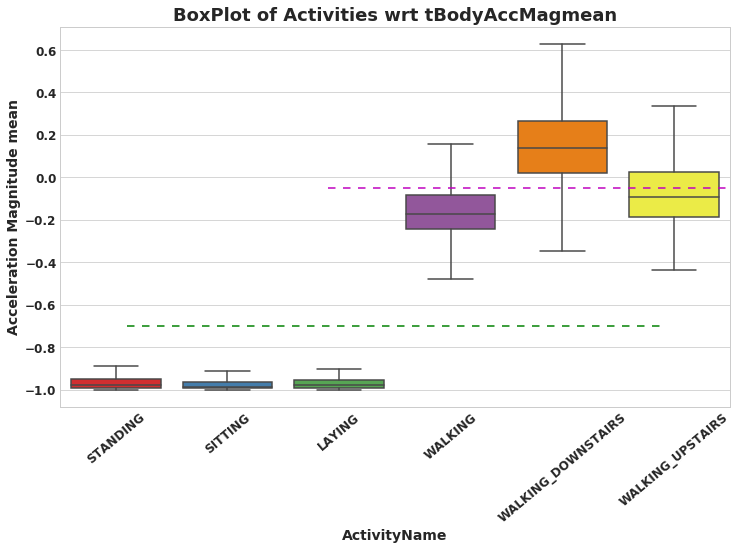

In [37]:
plt.figure(figsize=(12,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("BoxPlot of Activities wrt tBodyAccMagmean", fontsize=18, fontweight = 'bold')
plt.xlabel("ActivityName", fontsize=14, fontweight = 'bold')
plt.xticks(rotation = 40,fontsize=12, fontweight = 'bold')
plt.ylabel("Acceleration Magnitude mean", fontsize=14, fontweight = 'bold')
plt.yticks(fontsize=12, fontweight = 'bold')
plt.show()

<b>Observations</b>:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.(stationary activities)
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.(motion activities)
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4.1.3 EDA: angleXgravityMean & angleYgravityMean

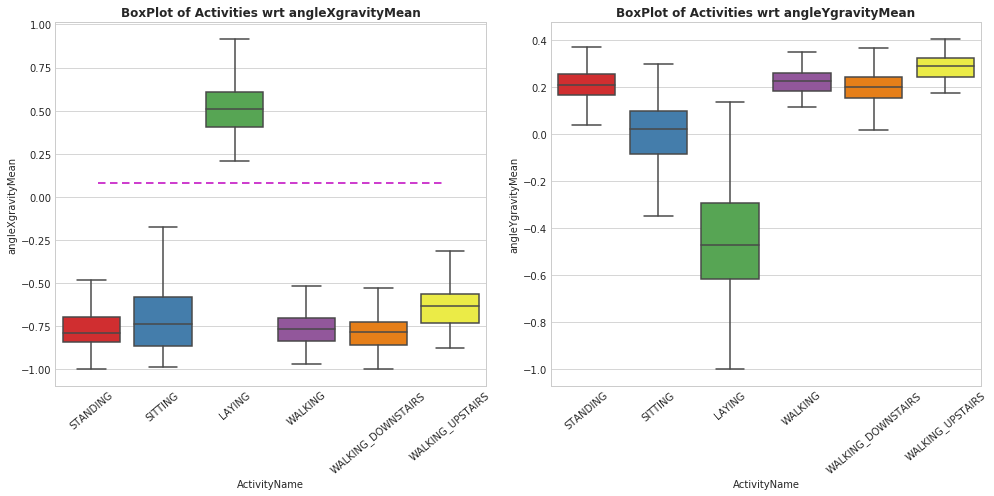

In [38]:
plt.figure(figsize=(14,7))

plt.subplot(121)
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train_data,showfliers=False, saturation=1)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title("BoxPlot of Activities wrt angleXgravityMean",fontweight = 'bold')
plt.xlabel("ActivityName")
plt.xticks(rotation = 40)
plt.ylabel("angleXgravityMean")

plt.subplot(122)
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train_data, showfliers=False, saturation=1)
plt.title("BoxPlot of Activities wrt angleYgravityMean", fontweight = 'bold')
plt.xlabel("ActivityName")
plt.xticks(rotation = 40)
plt.ylabel("angleYgravityMean")

plt.tight_layout()
plt.show()

<b>Observations</b>:
* If angleX,gravityMean > 0 then Activity is Laying.
* If angleY,gravityMean < -0.1 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

## 4.2 Apply t-sne on the data
To visulaize all the expert domain features in 2D space, we perform tsne.

In [17]:
def tsne_visualization(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        print('\nPerforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(n_components = 2, verbose=0, perplexity=perplexity).fit_transform(X_data)
        
        
        df = pd.DataFrame({'Dimension 1':X_reduced[:,0], 'Dimension 2':X_reduced[:,1] ,'label':y_data})
        
        sns.lmplot(data=df, x='Dimension 1', y='Dimension 2', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("Perplexity : {} and max_iter : {}".format(perplexity, n_iter), fontsize = 16, fontweight = 'bold')
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        plt.savefig(img_name)
        plt.show()


Performing tsne with perplexity 5 and with 1000 iterations at max


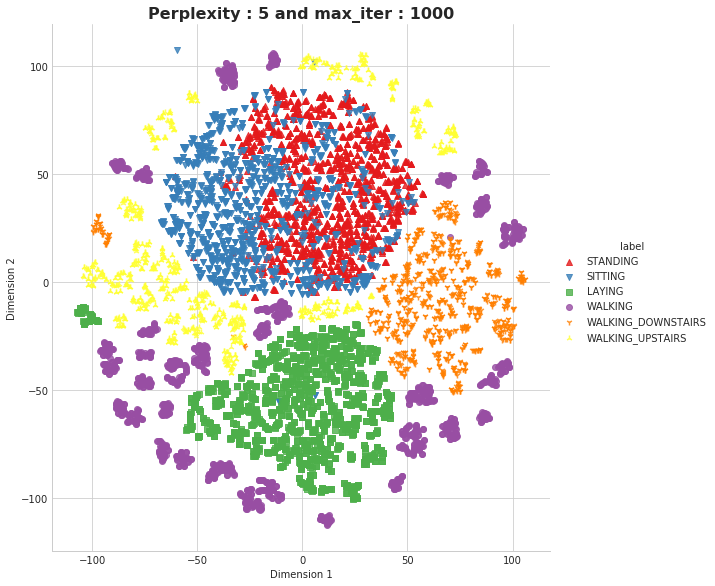


Performing tsne with perplexity 10 and with 1000 iterations at max


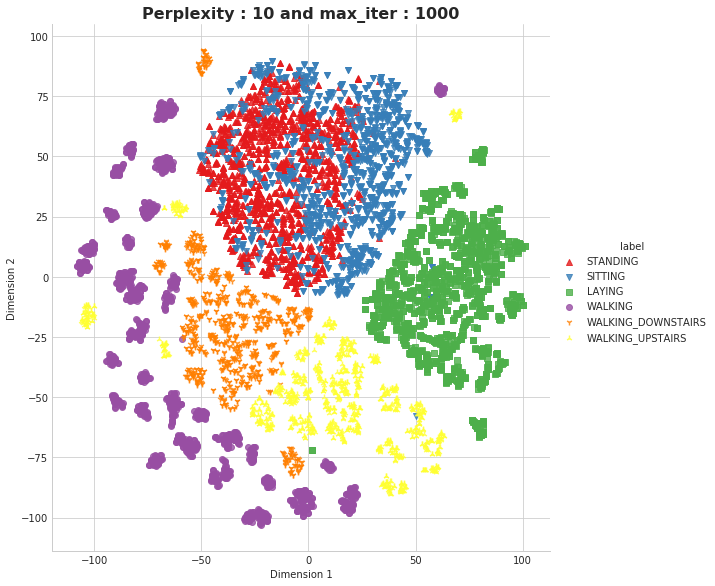


Performing tsne with perplexity 20 and with 1000 iterations at max


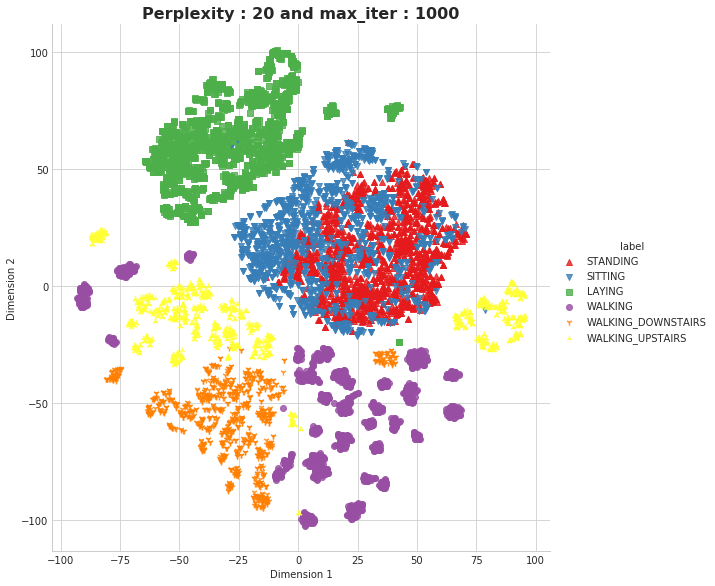


Performing tsne with perplexity 50 and with 1000 iterations at max


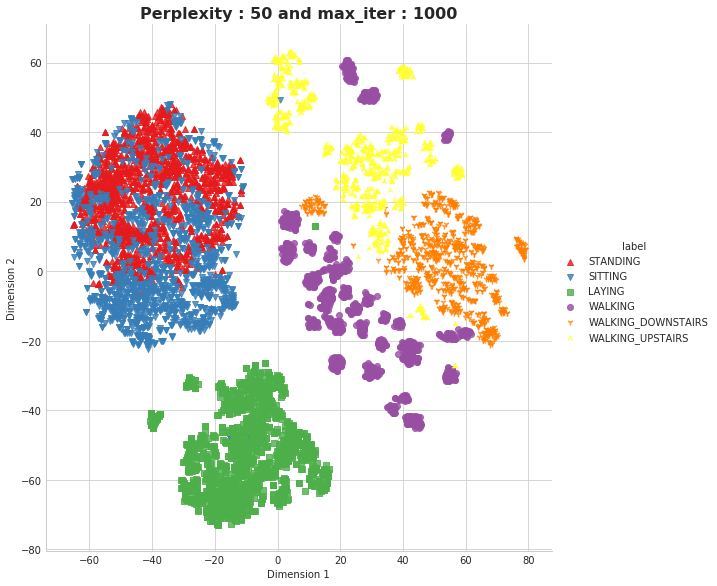

In [69]:
X_pre_tsne = train_data.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train_data['ActivityName']
tsne_visualization(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20,50])

<b>Observations:</b>
- All the labels(human activities) are clearly well separated except STANDING and SITTING.
- STANDING and SITTING have some overlapping regions even after multiple perplexities.

# 5. CLASSICAL MACHINE LEARNING MODELS

<b>Note: </b> We use classical ML Models to predict the human activities on test data using the expert domain engineered features.

###  Obtain the train and test data

In [27]:
X_train = train_data.drop(['subject','Activity','ActivityName'], axis = 1)
y_train = train_data.ActivityName

In [19]:
X_test = test_data.drop(['subject','Activity','ActivityName'], axis = 1)
y_test = test_data.ActivityName

In [20]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


### Function to plot the confusion matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [22]:
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize = 18, fontweight = 'bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize = 16, fontweight = 'bold')
    plt.xlabel('Predicted label',fontsize = 16, fontweight = 'bold')

### Generic function to run any ML model specified

In [23]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('Training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classificationreport = classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classificationreport
    print(classificationreport)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [24]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## 5.1 Logistic Regression with Grid Search

Training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  34 out of  36 | elapsed:   17.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   22.2s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:31.620763


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006365


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


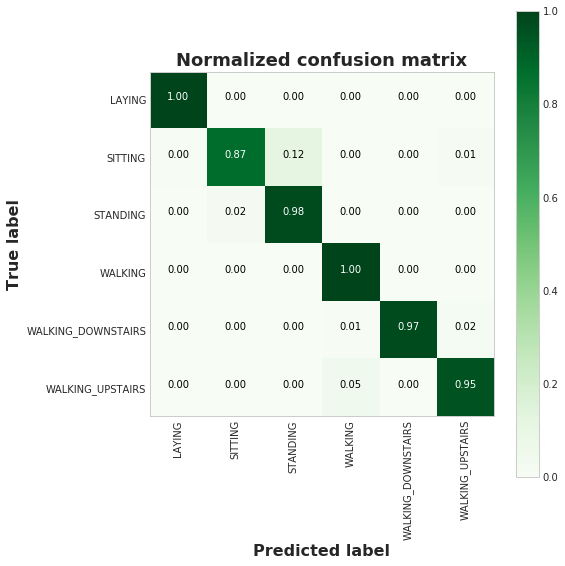

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [96]:
param_lr = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid = param_lr, cv = 3, verbose = 1, n_jobs = -1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels = labels)

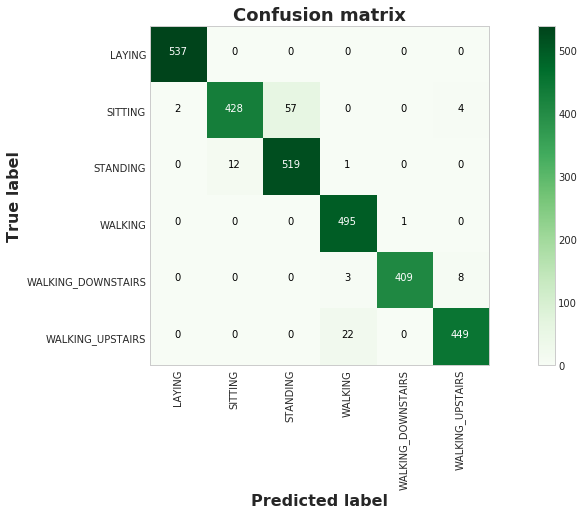

In [97]:
plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [98]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9460010881392819



##  5.2 Linear SVC with GridSearch

Training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.2s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:12.523687


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004569


---------------------
|      Accuracy      |
---------------------

    0.9657278588394977


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 425  60   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


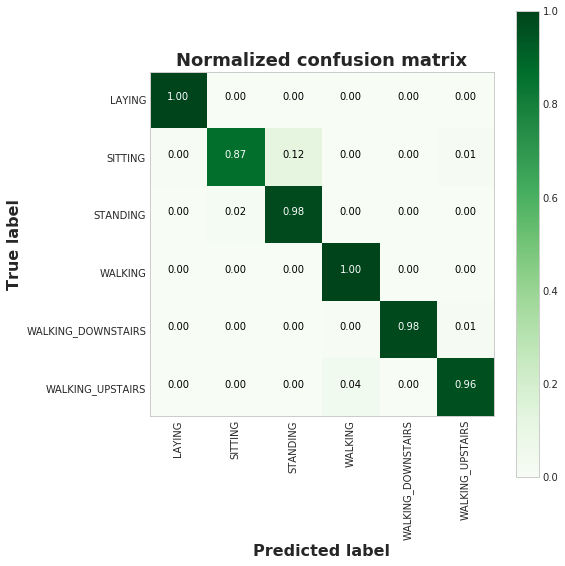

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.97      0.97      0.97      2947



In [99]:
param_linsvc = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=param_linsvc, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

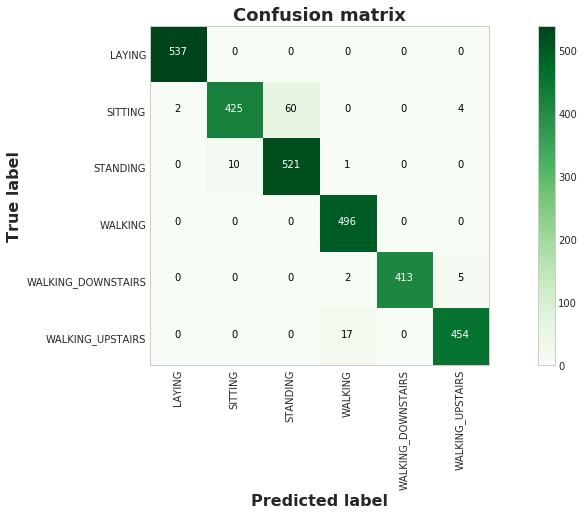

In [100]:
plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [101]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



# 5.3  Kernel SVM with GridSearch

Training the model..
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed:   59.1s remaining:   40.6s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.6min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:40.503690


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.493771


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


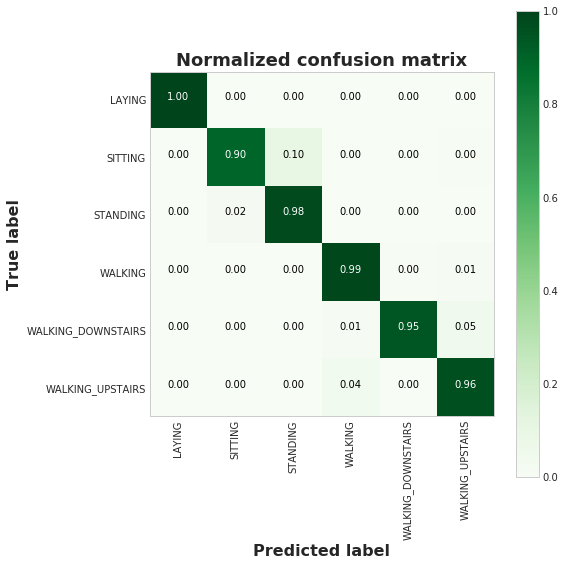

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [37]:
param_rbfsvc = {'C':[2,8,16],
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=param_rbfsvc, n_jobs=-1, verbose = 1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

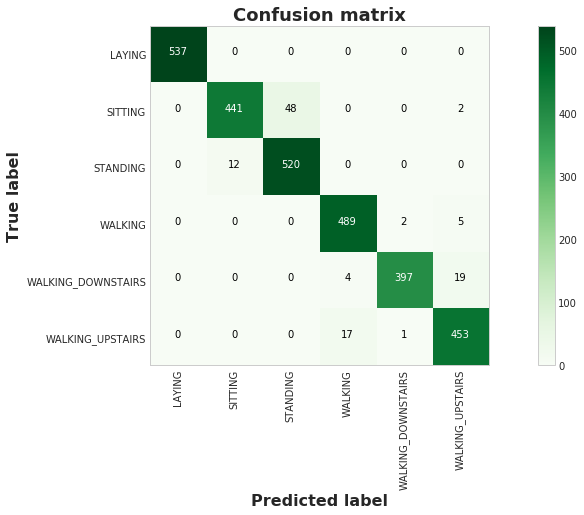

In [38]:
plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [39]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



## 5.4 Decision Trees with GridSearchCV

Training the model..
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.774189


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003758


---------------------
|      Accuracy      |
---------------------

    0.8649474041398032


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  12 347  61]
 [  0   0   0  73  29 369]]


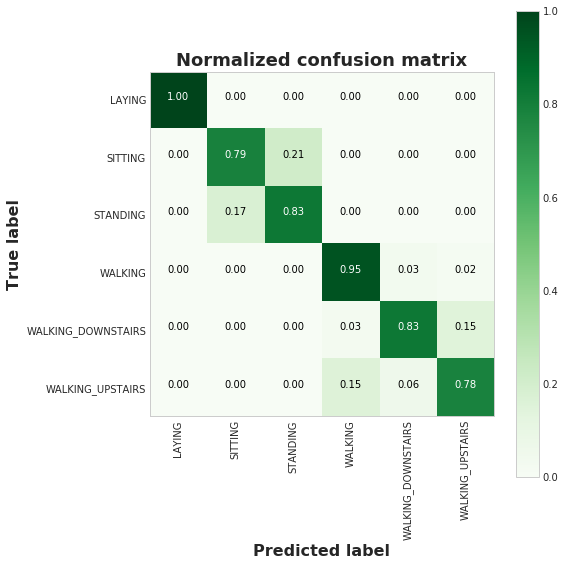

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.88      0.83      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.87      0.86      0.86      2947



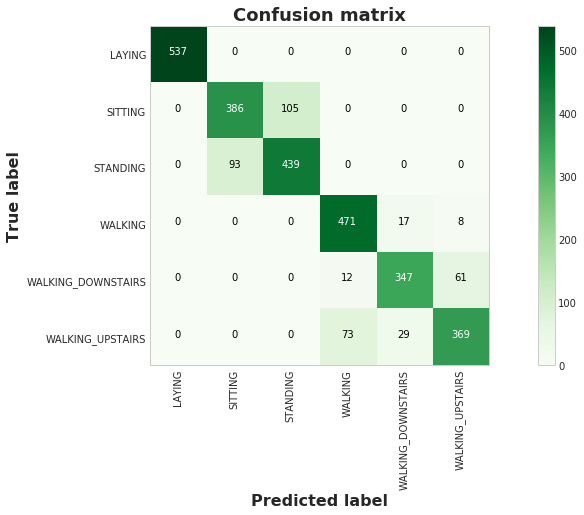

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8449401523394995



In [40]:
param_dt = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=param_dt, n_jobs=-1, verbose = 1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()
print_grid_search_attributes(dt_grid_results['model'])

## 5.5 Random Forest Classifier with GridSearch

Training the model..
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:32.834696


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.085783


---------------------
|      Accuracy      |
---------------------

    0.9097387173396675


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 421  70   0   0   0]
 [  0  53 479   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  35 337  48]
 [  0   0   0  42   6 423]]


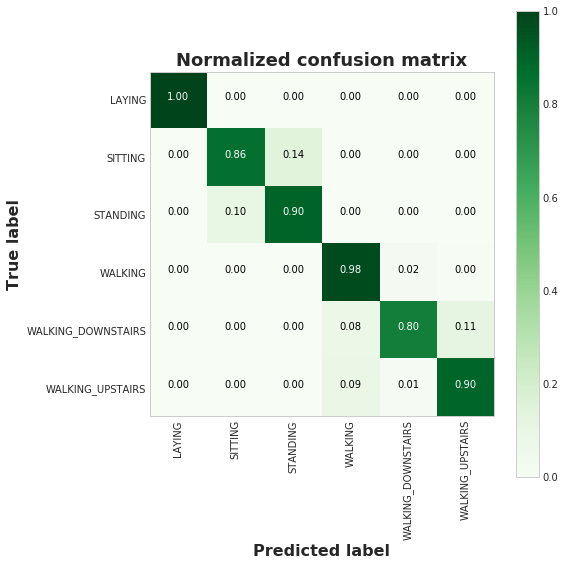

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.86      0.87       491
          STANDING       0.87      0.90      0.89       532
           WALKING       0.86      0.98      0.92       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

       avg / total       0.91      0.91      0.91      2947



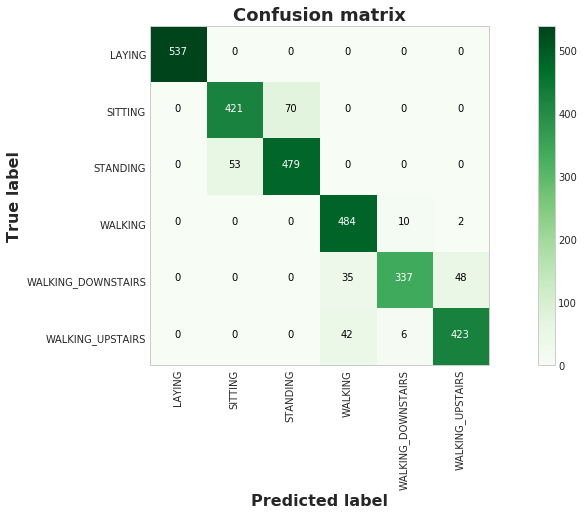

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7, 'n_estimators': 190}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9134929270946681



In [41]:
param_rf = {'n_estimators': np.arange(10,201,20),
          'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=param_rf, n_jobs=-1, verbose = 1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()
print_grid_search_attributes(rfc_grid_results['model'])

## 5.6  Gradient Boosted Decision Trees With GridSearch

Training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 31.0min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:36:59.677486


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.124088


---------------------
|      Accuracy      |
---------------------

    0.9229725144214456


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 398  91   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


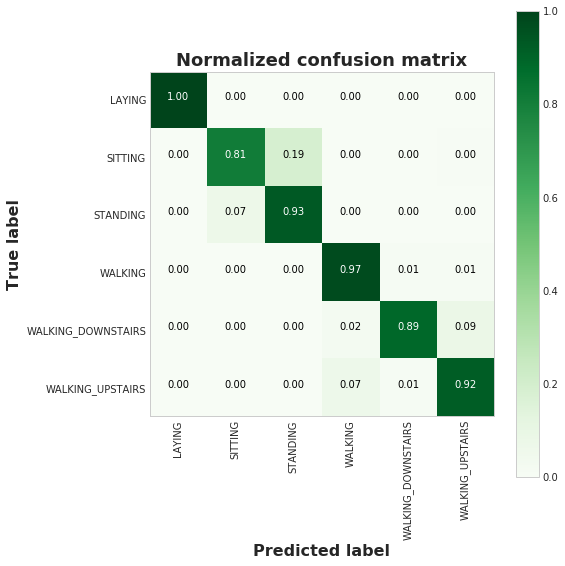

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947



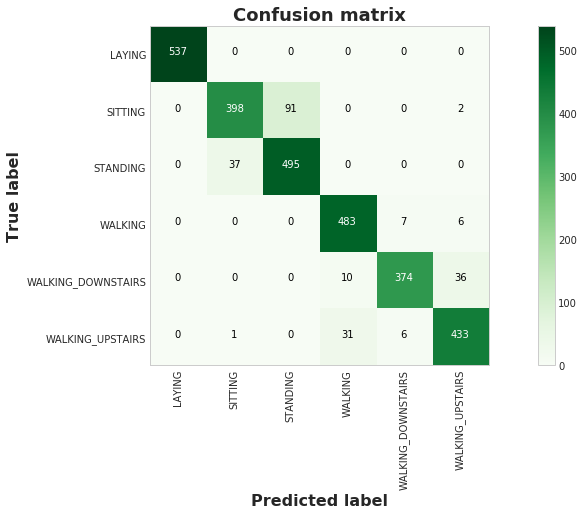

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 160}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.903

In [25]:
param_gradboost = {'max_depth': np.arange(5,8,1),
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_gradboost, n_jobs= -1, verbose = 1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)


plt.figure(figsize=(14,7))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()
print_grid_search_attributes(gbdt_grid_results['model'])

### Comparsion of various ML Models

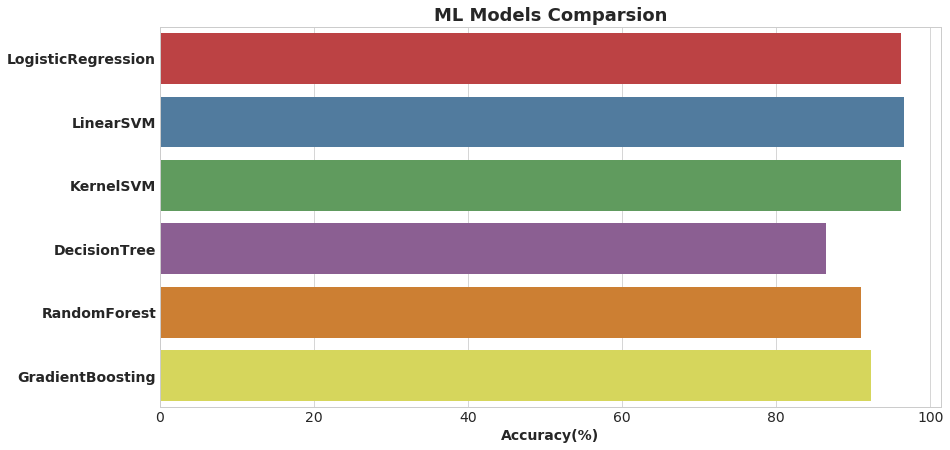

                Model  Accuracy
0  LogisticRegression     96.26
1           LinearSVM     96.57
2           KernelSVM     96.26
3        DecisionTree     86.49
4        RandomForest     90.97
5    GradientBoosting     92.29


In [28]:
model_names = ["LogisticRegression", "LinearSVM", "KernelSVM", "DecisionTree", "RandomForest", "GradientBoosting"]
model_accuracy = [96.26,96.57,96.26,86.49,90.97,92.29]
model_comparsion = pd.DataFrame(dict(x=model_names, y=model_accuracy))
model_comparsion.columns = ['Model', 'Accuracy']

plt.figure(figsize = (14,7))
sns.barplot("Accuracy","Model", data=model_comparsion)
plt.title("ML Models Comparsion", fontsize = 18, fontweight = 'bold')
plt.xlabel("Accuracy(%)", fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.ylabel("")
plt.yticks(fontsize = 14, fontweight = 'bold')

plt.show()

print(model_comparsion)

# 6. DEEP LEARNING(with raw timeseries features)

<b>Note:  </b>We use Deep Learning models to predict the human activities using raw timeseries features instead of engineered features provided by domain experts.

 Since here the raw features are temporal data(timeseries), we chose to use LSTM model to keep the sequential information.

In [33]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

### Loading the raw time series signals

In [34]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

### Loading the output labels

In [35]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

### Obtain the train and test data

In [36]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test, y_test

In [37]:
# Importing tensorflow
np.random.seed(9)
import tensorflow as tf
tf.set_random_seed(9)

In [38]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [39]:
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
X_train, Y_train, X_test, Y_test = load_data()

# joblib.load(X_train,"X_train.pkl")
# joblib.load(X_test,"X_test.pkl")
# joblib.load(Y_train,"Y_train.pkl")
# joblib.load(Y_test,"Y_test.pkl")

In [41]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [42]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [71]:
print("Dimensions of Train data: ",X_train.shape)
print("Dimensions of Test data: ",X_test.shape)
print("Number of classes/labels in Train data:",_count_classes(Y_train))
print("Number of classes/labels in Test data:",_count_classes(Y_test))

Dimensions of Train data:  (7352, 128, 9)
Dimensions of Test data:  (2947, 128, 9)
Number of classes/labels in Train data: 6
Number of classes/labels in Test data: 6


## 6.1  LSTM Model(2 Layered) using Hyperas

Reference 1 : https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b

Reference 2 : https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### 6.1.1 Data Function

In [72]:
def data():
    
    X_train = joblib.load("X_train.pkl")
    Y_train = joblib.load("Y_train.pkl")
    X_test = joblib.load("X_test.pkl")
    Y_test = joblib.load("Y_test.pkl")
    
    return X_train, Y_train, X_test, Y_test

### 6.1.2 Model Function

In [73]:
def lstm_model(X_train,Y_train, X_test,Y_test):
    
    #Network parameters
    timesteps = len(X_train[0])
    input_dim = len(X_train[0][0])
    n_classes = 6
    epochs = 30
    batch_size = 32
    
    #=======================Model Architecture============================#
    model = Sequential()
    
    #1st LSTM Layer
    model.add(LSTM({{choice([64,32])}}, return_sequences = True, input_shape=(timesteps, input_dim), name='lstm_1'))
    model.add(Dropout({{uniform(0, 1)}}, name='dropout_rate1'))
    
    #2nd LSTM Layer
    model.add(LSTM({{choice([32,16])}}, name='lstm_2'))
    model.add(Dropout({{uniform(0, 1)}}, name='dropout_rate2'))
    
    #Output Layer
    model.add(Dense(n_classes, activation='sigmoid', name='output_layer'))
    print(model.summary())
    
    #Training the model
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    model.fit(X_train, Y_train,
              epochs = epochs,
              batch_size = batch_size,
              verbose = 1,
              validation_data = (X_test, Y_test))
    
    score, acc = model.evaluate(X_test, Y_test)
    print('Test accuracy: ', acc)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

### 6.1.3 Execution and Finding the Best Model

In [ ]:
#Hyperparameter Tuning of the model
X_train, Y_train, X_test, Y_test = data()
best_run, best_model = optim.minimize(model=lstm_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals = 12,
                                          trials=Trials(),
                                          verbose = True,
                                          notebook_name='HAR')

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import warnings
except:
    pass

try:
    import itertools
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    from sklearn.manifold import TSNE
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.svm import LinearSVC, SVC
except:
    pass

try:
    from sklearn.tree import DecisionTreeClassifier
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    from sklearn.ensemble import GradientBoostingClassifier
except:
    pass

try:
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_re

In [ ]:
#saving the best model
best_model.save('best_lstm_model.h5')

### 6.1.4 Best Model Evaluation

In [ ]:
print("\33[1m-------------------Evalutation of best performing model-----------------------\33[0m\n")
score, acc = best_model.evaluate(X_test, Y_test, verbose = 0)
print("Test Loss: ", np.round(score,3))
print("Test Accuracy: ", np.round(acc * 100 ,3))

print("\n\33[1m-------------------Best performing model chosen hyper-parameters---------------\33[0m\n\n")
print(best_run)

-------------------Evalutation of best performing model-----------------------

Test Loss:  0.389
Test Accuracy:  91.381

-------------------Best performing model chosen hyper-parameters---------------


{'Dropout': 0.7371698374615214, 'Dropout_1': 0.6517968154887782, 'LSTM': 1, 'LSTM_1': 0}


<b>Observations:</b>
-  Test Aaccuracy is 91.38%.
-  TestLoss is 0.38.
-  'LSTM': 1 represents the best number of neurons in first LSTM layer is 32.
-  'LSTM_1': 0 represents the best number of neurons in second LSTM layer is 32.
-   Best Dropout rate in the first hidden layer is 0.737.
-   Best rate in the second hidden layer is 0.65.

### 6.1.5 Confusion Matrix,Precision,Recall

In [74]:
best_model = load_model('best_lstm_model.h5')
Y_pred = best_model.predict(X_test, verbose=1)

2947/2947 [==============================] - 17s 6ms/step


In [75]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_test, axis=1)])
Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

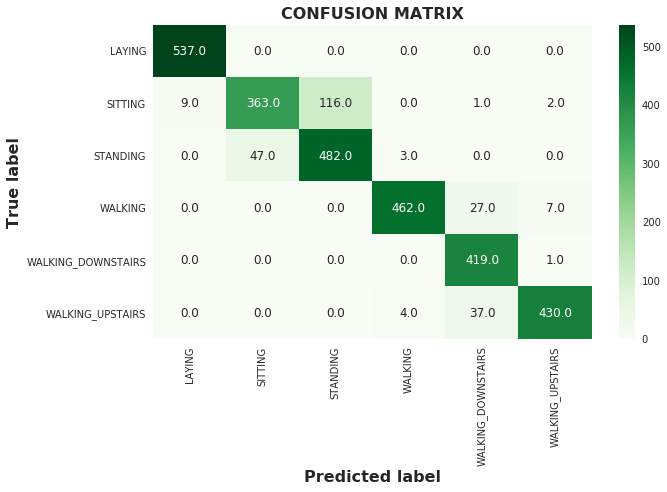


-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       537
           SITTING       0.89      0.74      0.81       491
          STANDING       0.81      0.91      0.85       532
           WALKING       0.99      0.93      0.96       496
WALKING_DOWNSTAIRS       0.87      1.00      0.93       420
  WALKING_UPSTAIRS       0.98      0.91      0.94       471

       avg / total       0.92      0.91      0.91      2947



In [114]:
conf_matrix = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, cmap ='Greens', annot = True, fmt = ".1f", xticklabels = labels, yticklabels = labels)
plt.title("CONFUSION MATRIX",fontsize = 16, fontweight = 'bold' )
plt.ylabel('True label',fontsize = 16, fontweight = 'bold')
plt.xlabel('Predicted label',fontsize = 16, fontweight = 'bold')

plt.tight_layout()
plt.show()


print('\n-------------------------')
print('| Classifiction Report |')
print('-------------------------')
print(classification_report(Y_true, Y_pred))

# 7. CONCLUSION
### 7.1 Classical ML Models Performance with expert features

| ML Model | <b>Test Accuracy</b> |
| --- | --- |
| <b>Logistic Regression</b> | 96.26 % |
| <b>Linear SVM</b> | 96.57 % |
| <b>Radial Kernel SVM</b> | 96.26 % |
| <b>Decission Trees</b> | 86.49 % |
| <b>Random Forest</b> | 90.97 % |
| <b>Gradient Boost Decision Tree</b> | 92.29 % |


### 7.2 Deep Learning LSTM Model with raw timeseries features
| LSTM Model | <b>Test Accuracy</b> | <b>Test Loss</b> |
| --- | --- | --- |
| <b>Input Layer->32 LSTM->Dropout(0.73)-><br>32 LSTM->Dropout(0.65)->Output Layer</b> | 91.381 % | 0.38 |

-  There is a slightly confusion between STANDING and SITTING in all models, rest of the activities are well predicted.

-  It is observed that even a 2 layered LSTM model performs very well with an accuracy of 91.38 % and loss of 0.38 using the raw time series features.

-  It can be concluded that Deep learning models can perform  well even if we do not have engineered features/ domain knowledge.